In [1]:
import networkx as nx   
import matplotlib.pyplot as plt  
from pyoxigraph import *
import chromadb
from pprint import pprint
from embedding_pipeline import *
from utils import pop_blank_to_class_list

/home/kipp_sa/github/EmbedAlign/embed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file = "/home/kipp_sa/github/EmbedAlign/test/bfo-core.owl"
store = Store()
store.load(path = file, format = RdfFormat.RDF_XML)

Client = chromadb.Client()
label_collection = Client.get_or_create_collection(name="labels")
structure_collection = Client.get_or_create_collection(name = "Structure")

In [3]:
class_bindings = get_classes(store)
for c in class_bindings:
    pprint(c)

{'iri': 'http://purl.obolibrary.org/obo/BFO_0000203',
 'label': 'temporal instant',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000148']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000202',
 'label': 'temporal interval',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000038']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000182',
 'label': 'history',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000015']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000148',
 'label': 'zero-dimensional temporal region',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000008']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000147',
 'label': 'fiat point',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000146',
 'label': 'fiat surface',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000145',
 'label': 'relational quality',
 'parents': ['http://purl.obolibrary.org/obo/BFO_000

In [4]:
prop_bindings = get_object_properties(store)
pprint(prop_bindings)

[{'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has last instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000224>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'last instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000223>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has first instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000222>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'first instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000221>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_00

In [5]:
for p in prop_bindings:
    if type(p["dom"][0]) == BlankNode:
        print(p)

{'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000210>, 'label': 'occupies spatial region', 'dom': [<BlankNode value=ab716a5d8d801353dd94d1231e119d2a>], 'ran': ['http://purl.obolibrary.org/obo/BFO_0000006']}
{'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000200>, 'label': 'occupies spatiotemporal region', 'dom': [<BlankNode value=d20fc5cf8931c83bb452ea9c367deea7>], 'ran': ['http://purl.obolibrary.org/obo/BFO_0000011']}
{'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000199>, 'label': 'occupies temporal region', 'dom': [<BlankNode value=a9f5ee2f0a6f85d7d671f391d6a62886>], 'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']}
{'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000196>, 'label': 'bearer of', 'dom': [<BlankNode value=eae4f154aa624b50c98f541c267d23c8>], 'ran': ['http://purl.obolibrary.org/obo/BFO_0000020']}
{'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000194>, 'label': 'specifically depended on by', 'do

In [6]:
props = set_prop_dom_ran(prop_bindings, store = store)
pprint(props)

[{'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has last instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000224>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'last instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000223>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has first instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000222>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000203']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'first instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000221>,
  'ran': ['http://purl.obolibrary.org/obo/BFO_0000008']},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_00

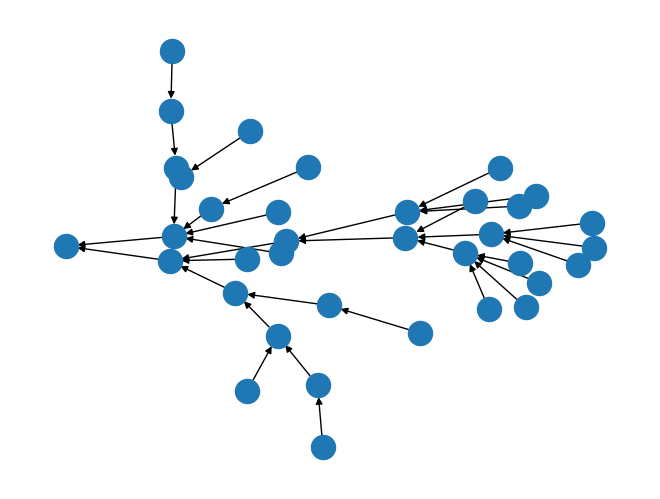

In [7]:
graph = create_core_graph(class_bindings)
nx.draw(graph)

dom-ran-graph creation : 0.0001571178436279297


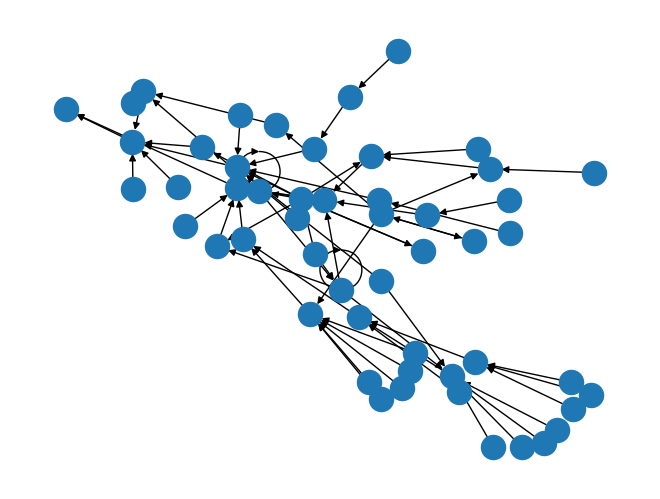

In [9]:
full = create_dom_ran_graph(graph, prop_bindings)
nx.draw(full)

## TEST WITH BLANKNODES

>[!WARNING]  
>
>blank node identifiers change with resetting of kernel or restarting store in general!